In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import random
from scipy.stats import spearmanr

In [2]:
alpha_screen = pd.read_csv("../../data/salmon_data/alpha_mae_df_1.csv", index_col=0)
mae_df = pd.read_csv("../../data/salmon_data/results_ave_mae_1.csv", index_col=0)
salmon_GO = pd.read_csv("../../data/salmon_data/salmon_GO_annotations.tsv", sep='\t')
salmon_GO

,SYMBOL,ENTREZID,GENENAME,GO,ONTOLOGY,GO.term
0,1433b,100196586.0,14-3-3 protein beta/alpha,NaN,NaN,NaN
1,143b2,100195171.0,14-3-3 protein beta/alpha-2,GO:0004497,MF,"Term = \monooxygenase activity\"""""
2,143g1,100380373.0,14-3-3 protein gamma-1,NaN,NaN,NaN
3,143g2,100194987.0,14-3-3 protein gamma-2,NaN,NaN,NaN
4,2a5e,100195340.0,Serine/threonine-protein phosphatase 2A 56 kDa...,GO:0000159,CC,"Term = \protein phosphatase type 2A complex\"""""
...,...,...,...,...,...,...
96336,zufsp,100380430.0,zinc finger containing ubiquitin peptidase 1,NaN,NaN,NaN
96337,zwilch,106584830.0,zwilch kinetochore protein,NaN,NaN,NaN
96338,zyg11,106613955.0,"zyg-11 family member, cell cycle regulator",NaN,NaN,NaN
96339,zzef1,106567411.0,"zinc finger, ZZ-type with EF hand domain 1",GO:0005509,MF,"Term = \calcium ion binding\"""""


Text(0, 0.5, 'MAE')

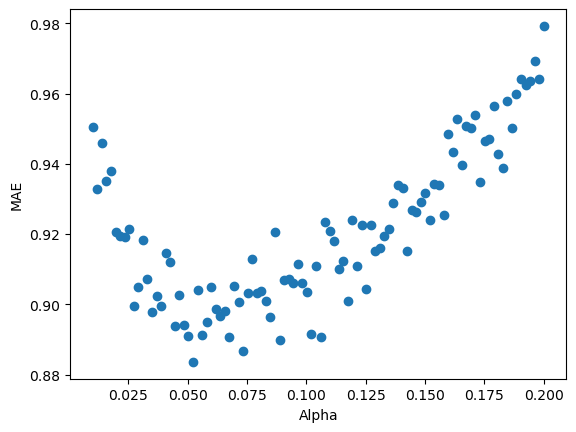

In [3]:
plt.scatter(x=alpha_screen.alphas, y= alpha_screen.mae_list)
plt.xlabel("Alpha")
plt.ylabel("MAE")

In [4]:
error_low = []
error_high = []
min_mae = np.inf
best_alpha = None
best_alpha_stdev = None
for index, row in alpha_screen.iterrows():
    cv =  ast.literal_eval(row["all_maes"])
    error_low.append(np.percentile(cv, 5))
    error_high.append(np.percentile(cv, 95))
    mean_mae = row["mae_list"]
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_alpha = row["alphas"]
        best_alpha_stdev = np.std(cv)


In [5]:
best_alpha

0.0522222222222222

In [6]:
best_alpha_stdev

0.05599943899337858

In [7]:
min_mae

0.8836312304351006

In [8]:
best_alpha_plus_std = min_mae + best_alpha_stdev
best_alpha_plus_std

0.9396306694284792

In [9]:
chosen_alpha_df = alpha_screen[alpha_screen["mae_list"] < best_alpha_plus_std]
chosen_alpha_df = chosen_alpha_df[chosen_alpha_df["alphas"] > best_alpha]
chosen_alpha_df.sort_values(by="mae_list", inplace=True)
chosen_alpha = chosen_alpha_df["alphas"].iloc[0]
chosen_alpha

0.0733333333333333

In [10]:
light_green = (0.0, 0.6, 0.5)
pink = (1, 0.078, 0.576)

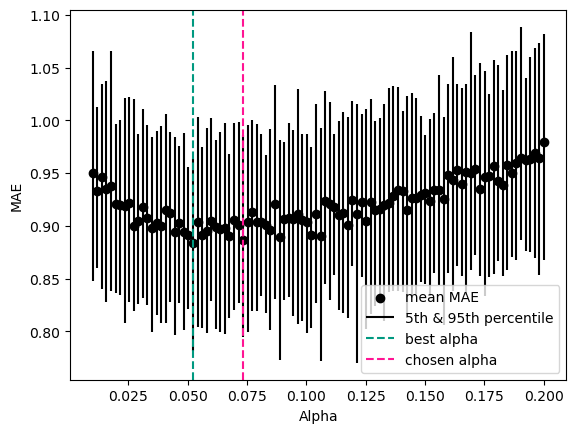

In [11]:
plt.scatter(x=alpha_screen.alphas, 
            y= alpha_screen.mae_list,
            c='k',
            label="mean MAE")
plt.vlines(alpha_screen.alphas, 
           error_low, 
           error_high,
           colors='k',
           label = "5th & 95th percentile")
plt.axvline(x=best_alpha, color=light_green, linestyle='--', label = "best alpha")
plt.axvline(x=chosen_alpha, color=pink, linestyle='--', label = "chosen alpha")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.legend(loc="lower right")

In [12]:
# Rename for plotting
mae_df["Gene"] = mae_df["Gene"].astype(str).str.replace('_', ' ')

In [13]:
mae_df

,Gene,ave_MAE
0,mmp13,1.014911
1,LOC123723770,0.998317
2,fgd4a,1.005931
3,LOC106601563,1.001144
4,LOC106601071,0.977070
...,...,...
366,LOC106602034,0.994545
367,LOC106590538,1.002933
368,LOC106581262,1.014054
369,micu1,1.010091


             Gene   ave_MAE
27            hba  0.958022
71   LOC106566372  0.961763
104  LOC106607380  0.961865
57   LOC106601072  0.965285
72           duox  0.969003


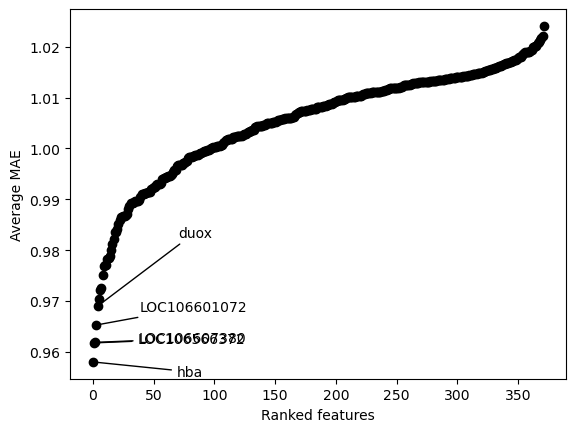

In [14]:
mae_df.sort_values(by="ave_MAE", inplace=True)

print(mae_df.head())

mae_list = list(mae_df["ave_MAE"])
feature_list = list(mae_df["Gene"])
x = np.linspace(0, len(mae_df), len(mae_df))
y = mae_list

plt.scatter(x, y, c='k')
plt.annotate(feature_list[0], (x[0], y[0]), textcoords="offset points", xytext=(70,-10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[1], (x[1], y[1]), textcoords="offset points", xytext=(70,0), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[2], (x[2], y[2]), textcoords="offset points", xytext=(70,0), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[3], (x[3], y[3]), textcoords="offset points", xytext=(70,10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[4], (x[4], y[4]), textcoords="offset points", xytext=(70,50), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.ylabel("Average MAE")
plt.xlabel("Ranked features")
plt.show()

Text(-0.18, 1.05, 'b)')

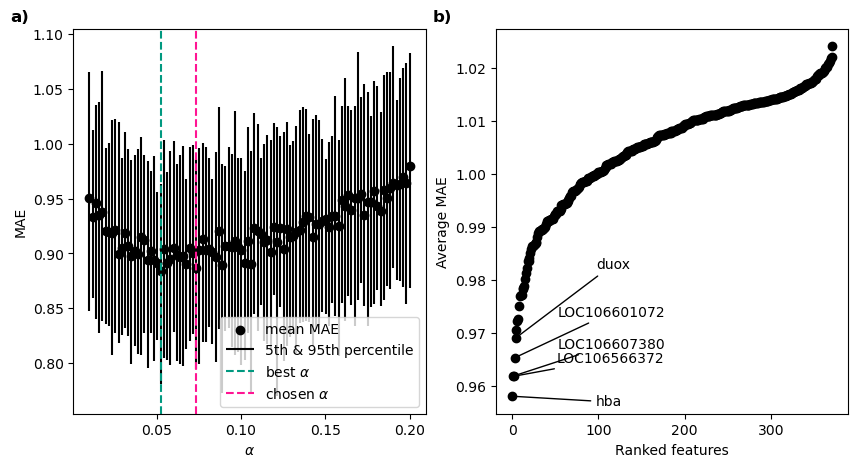

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

ax1.scatter(x=alpha_screen.alphas, 
            y= alpha_screen.mae_list,
            c='k',
            label="mean MAE")
ax1.vlines(alpha_screen.alphas, 
           error_low, 
           error_high,
           colors='k',
           label = "5th & 95th percentile")
ax1.axvline(x=best_alpha, color=light_green, linestyle='--', label = r"best $\alpha$")
ax1.axvline(x=chosen_alpha, color=pink, linestyle='--', label = r"chosen $\alpha$")
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel("MAE")
ax1.legend(loc="lower right")

ax2.scatter(x, y, c='k')
ax2.annotate(feature_list[0], (x[0], y[0]), textcoords="offset points", xytext=(70,-7), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[1], (x[1], y[1]), textcoords="offset points", xytext=(70,10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[2], (x[2], y[2]), textcoords="offset points", xytext=(70,20), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[3], (x[3], y[3]), textcoords="offset points", xytext=(70,30), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[4], (x[4], y[4]), textcoords="offset points", xytext=(70,50), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

ax2.set_ylabel("Average MAE")
ax2.set_xlabel("Ranked features")

ax1.text(-0.18, 1.05, 'a)', transform=ax1.transAxes, fontsize=12, fontweight='bold', va='top')
ax2.text(-0.18, 1.05, 'b)', transform=ax2.transAxes, fontsize=12, fontweight='bold', va='top')

In [16]:
# Top genes
top20genes = list(mae_df.head(20)["Gene"])
top20genes

['hba',
 'LOC106566372',
 'LOC106607380',
 'LOC106601072',
 'duox',
 'LOC123724067',
 'LOC106576057',
 'pgfrl',
 'LOC106583594',
 'LOC106578021',
 'LOC106601071',
 'LOC106561261',
 'LOC106602771',
 'LOC106607236',
 'LOC106601077',
 'LOC106594147',
 'LOC106596975',
 'si:ch211-106h4.4',
 'LOC106592358',
 'LOC106575107']

In [17]:
['LOC106566372',
 'hba',
 'LOC106607380',
 'duox',
 'LOC106583594',
 'LOC106601072',
 'pgfrl',
 'LOC106601071',
 'LOC106578021',
 'LOC123724067']

['LOC106566372',
 'hba',
 'LOC106607380',
 'duox',
 'LOC106583594',
 'LOC106601072',
 'pgfrl',
 'LOC106601071',
 'LOC106578021',
 'LOC123724067']

In [18]:
contains_hemoglobin = salmon_GO.dropna()
contains_hemoglobin = contains_hemoglobin[contains_hemoglobin["GENENAME"].str.contains("hemoglobin")]
contains_hemoglobin.shape

(100, 6)

In [19]:
# Calc for the probability of encountering hemoglobin genes 5 times
all_gene_names = list(salmon_GO["GENENAME"].unique())
len(all_gene_names)

32357

In [20]:
hemoglobin_count_list = []
for iteration in range(10000):
    random20 = random.sample(all_gene_names, 20)
    hemoglobin_count = 0
    for gene in random20:
        if "hemoglobin" in str(gene):
            hemoglobin_count += 1
    hemoglobin_count_list.append(hemoglobin_count)

In [21]:
max(hemoglobin_count_list)

1

Text(0.5, 0, 'Number of hemoglobin genes')

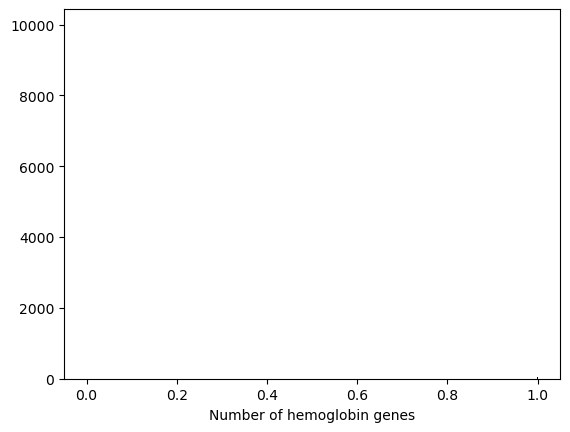

In [22]:
plt.hist(hemoglobin_count_list, bins=1000, color='k')
plt.xlabel("Number of hemoglobin genes")

In [23]:
random20

['gamma-tubulin complex component 3 homolog',
 'protein FAM163A',
 'signal transducer and activator of transcription 5B',
 'uncharacterized LOC123725594',
 'caspase recruitment domain-containing protein 19-like',
 'aquaporin-3-like',
 'endoribonuclease ZC3H12A-like',
 'solute carrier family 7 member 5',
 'uncharacterized LOC106602910',
 'methionine-R-sulfoxide reductase B1-A-like',
 'sperm acrosome associated 4 like',
 'EMILIN-2',
 'zinc finger MIZ domain-containing protein 2',
 'membrane metallo-endopeptidase-like 1',
 'chloride channel protein 2-like',
 'STARD3 N-terminal like',
 'THO complex subunit 2',
 'inversin',
 'uncharacterized LOC106583921',
 'ADP-ribosylation factor-like protein 3']

In [24]:
transcriptome_XY = pd.read_csv("../../data/transcriptome_XY.csv", index_col=0)
transcriptome_XY

FileNotFoundError: [Errno 2] No such file or directory: '../../data/transcriptome_XY.csv'

In [ ]:
hemoglobin_genes = ["hba", "LOC106607380", "LOC106601072", "LOC106601071", "LOC123724067"]
hemoglobin_genes_df = transcriptome_XY[hemoglobin_genes]
hemoglobin_genes_df

,hba,LOC106607380,LOC106601072,LOC106601071,LOC123724067
F001,7.841489,6.684127,9.049141,6.934034,7.471161
F002,8.049102,7.776955,8.876601,7.313821,7.894540
F003,9.321372,9.142760,10.515895,8.078872,9.749636
F004,9.442323,7.953808,10.629716,9.164211,7.985053
F005,9.187983,8.223300,10.425331,8.316614,7.714572
...,...,...,...,...,...
F450,9.183097,8.909547,10.836300,8.788188,9.540840
F456,10.432081,9.924495,11.906412,9.321568,9.459813
F458,8.419208,8.547975,9.500379,6.595032,6.923386
F459,6.873686,5.033837,6.992821,7.403194,5.033837


In [ ]:
hemoglobin_genes_df.corr()

,hba,LOC106607380,LOC106601072,LOC106601071,LOC123724067
hba,1.000000,0.900110,0.946565,0.907537,0.764438
LOC106607380,0.900110,1.000000,0.901939,0.787359,0.839774
LOC106601072,0.946565,0.901939,1.000000,0.914895,0.765783
LOC106601071,0.907537,0.787359,0.914895,1.000000,0.600831
LOC123724067,0.764438,0.839774,0.765783,0.600831,1.000000


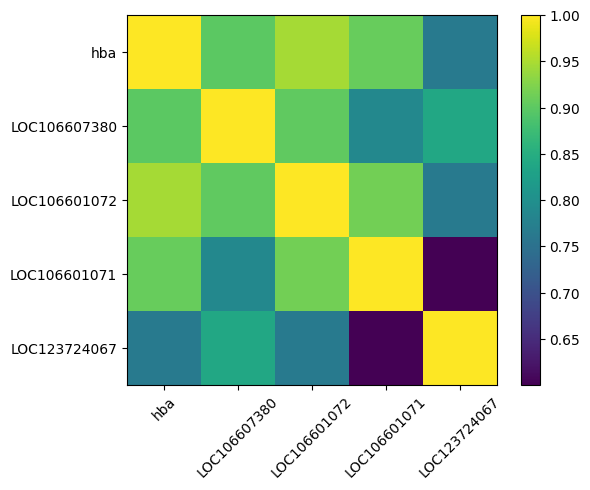

In [ ]:
plt.imshow(hemoglobin_genes_df.corr())
plt.xticks(np.arange(len(hemoglobin_genes)), hemoglobin_genes, rotation=45)
plt.yticks(np.arange(len(hemoglobin_genes)), hemoglobin_genes)
plt.colorbar()

In [ ]:
for hgene_a in hemoglobin_genes:
    for hgene_b in hemoglobin_genes:
        if hgene_a != hgene_b:
            rho, p_value = spearmanr(x, y)
            print(hgene_a, hgene_b, p_value)

hba LOC106607380 0.0
hba LOC106601072 0.0
hba LOC106601071 0.0
hba LOC123724067 0.0
LOC106607380 hba 0.0
LOC106607380 LOC106601072 0.0
LOC106607380 LOC106601071 0.0
LOC106607380 LOC123724067 0.0
LOC106601072 hba 0.0
LOC106601072 LOC106607380 0.0
LOC106601072 LOC106601071 0.0
LOC106601072 LOC123724067 0.0
LOC106601071 hba 0.0
LOC106601071 LOC106607380 0.0
LOC106601071 LOC106601072 0.0
LOC106601071 LOC123724067 0.0
LOC123724067 hba 0.0
LOC123724067 LOC106607380 0.0
LOC123724067 LOC106601072 0.0
LOC123724067 LOC106601071 0.0
